In [86]:
import matplotlib.pyplot as plt
from spec_id import Gen_sim, Median_w_Error_cont
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [104]:
spec = Gen_sim('s44042',1.611,.015,3.0,0,maxwv=11400)

../data/galaxy_flts/s44042_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s44042_flt: photutils.source_properties


Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s44042_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s44042_flt: save ../data/galaxy_flts/s44042_flt.detect_seg.fits, ../data/galaxy_flts/s44042_flt.detect.cat


In [105]:
spec.Perturb_flux()

In [106]:
IDF = []
for i in range(len(spec.gal_wv_rf)):
    if 3910 <= spec.gal_wv_rf[i] <= 4030 or 4080 <= spec.gal_wv_rf[i] <= 4125 \
            or 4250 <= spec.gal_wv_rf[i] <= 4385 or  4810 <= spec.gal_wv_rf[i]<= 4910 or 5110 <= spec.gal_wv_rf[i] <= 5285:
        IDF.append(i)

IDC = []
for i in range(len(spec.gal_wv_rf)):
    if spec.gal_wv_rf[0] <= spec.gal_wv_rf[i] <= 3800 or 3850 <= spec.gal_wv_rf[i] <= 3910 or 4030 <= \
            spec.gal_wv_rf[i] <= 4080 or 4125 <= spec.gal_wv_rf[i] <= 4250 or 4385 <= spec.gal_wv_rf[i] <= 4515 or \
            4570 <= spec.gal_wv_rf[i] <= 4810 or 4910 <= spec.gal_wv_rf[i] <= 4975 or 5055 <= spec.gal_wv_rf[i] <= \
            5110 or 5285 <= spec.gal_wv_rf[i] <= spec.gal_wv_rf[-1]:
        IDC.append(i)

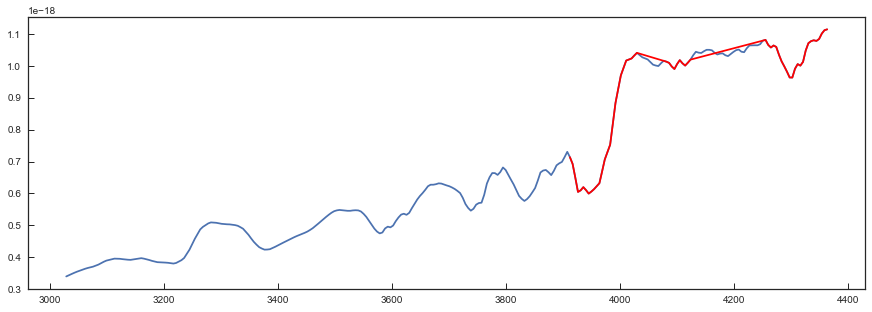

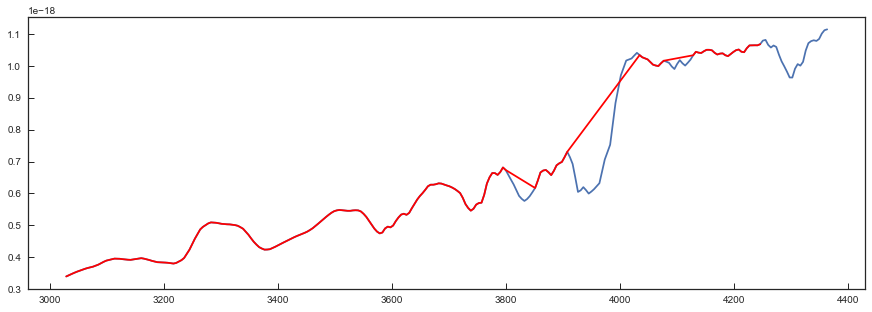

In [107]:
%matplotlib inline

plt.figure(figsize=[15,5])
plt.plot(spec.gal_wv_rf,spec.fl)
plt.plot(spec.gal_wv_rf[IDF],spec.fl[IDF],'r')
plt.show()
plt.close()

plt.figure(figsize=[15,5])
plt.plot(spec.gal_wv_rf,spec.fl)
plt.plot(spec.gal_wv_rf[IDC],spec.fl[IDC],'r')
plt.show()
plt.close()

In [108]:
med = np.zeros(100)
meddf = np.zeros(100)

    
for u in range(100): 
    spec.Perturb_flux()
    chi=np.zeros(len(age))
    chif=np.zeros(len(age))
    chic=np.zeros(len(age))
    
    for i in range(len(age)):
        spec.Sim_spec(0.015,age[i],0)
        chi[i]=sum(((spec.flx_err - spec.mfl)/spec.gal_er)**2)
        chif[i]=sum(((spec.flx_err[IDF] - spec.mfl[IDF])/spec.gal_er[IDF])**2)
        chic[i]=sum(((spec.flx_err[IDC] - spec.mfl[IDC])/spec.gal_er[IDC])**2)
    
    P=np.exp(-chi/2).astype(np.float128)
    Pf=np.exp(-chif/2).astype(np.float128)
    Pc=np.exp(-chic/2).astype(np.float128)
    
    P /= np.trapz(P,age).astype(np.float128)
    Pf /= np.trapz(Pf,age).astype(np.float128)
    Pc /= np.trapz(Pc,age).astype(np.float128)
    Pdf = (Pf)*(Pc)
    
    Pdf /= np.trapz(Pdf,age).astype(np.float128)
    med[u],ml,mh = Median_w_Error_cont(P,age)
    meddf[u],ml,mh = Median_w_Error_cont(Pdf,age)

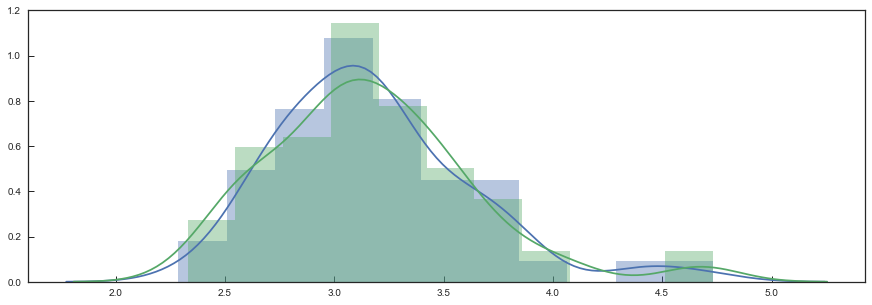

In [109]:
plt.figure(figsize=[15,5])
sea.distplot(med)
sea.distplot(meddf)
# plt.hist(med)
plt.show()
plt.close()

In [110]:
print np.median(med)
print np.median(meddf)

3.13426853707
3.12324649299
